In [3]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [55]:
(train_X,train_Y), (test_X, test_Y) = fashion_mnist.load_data()

In [ ]:
# Next we analyze how images in the dataset look like
# Even though you know the dimension of the images by now, it's still worth the effort to analyze it programmatically: you might have to rescale the image pixels and resize the images.

In [56]:
import numpy as np
from keras.utils import to_categorical #convert to binay?
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf 

In [6]:
print ('Training data shape:', train_X.shape, train_Y.shape)
print ('Testing data shape:', test_X.shape, test_Y.shape)

Training data shape: (60000, 28, 28) (60000,)
Testing data shape: (10000, 28, 28) (10000,)


In [ ]:
# From the above output, we can see that the training data has a shape of 60000 x 28 x 28 since there are 60,000 training samples each of 28 x 28 dimension. Similarly, the test data has a shape of 10000 x 28 x 28 since there are 10,000 testing samples.

In [7]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes) #len ?
print('Total number of outputs:', nClasses)
print('Output classes:', classes)

Total number of outputs: 10
Output classes: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# From the result above, there's a total of ten output classes that range from 0 to 9. Also, we can take a look at what the images in your dataset:

Text(0.5, 1.0, 'Ground Truth:9')

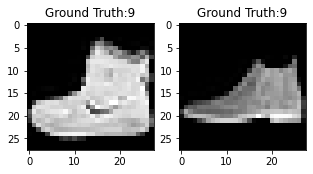

In [57]:
plt.figure(figsize = [5,5])

# Display the first image in training data
plt.subplot(121) #what does it stand for?
plt.imshow(train_X[0,:,:], cmap = 'gray')
plt.title('Ground Truth:{}'.format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:],cmap = 'gray')
plt.title('Ground Truth:{}'.format(test_Y[0]))


In [65]:
# The output of above two plots looks like an ankle boot, and this class is assigned a class label of 9. Similarly, other fashion products will have different labels, but similar products will have same labels. This means that all the 7,000 ankle boot images will have a class label of 9.

In [66]:
# Data Processing

# As we can see in the above plot, the images are grayscale images have pixel values that range from 0 to 255. Also, these images have a dimension of 28 x 28. As a result, we'll need to preprocess the data before you feed it into the model.


In [62]:
# First, convert each 28 x 28 image of the train and test set into a matrix of size 28 x 28 x 1 which is fed into the network.

train_X = train_X.reshape(-1,28,28,1) # why -1?
test_X = test_X.reshape(-1,28,28,1)
train_X.shape, test_X.shape

((48000, 28, 28, 1), (10000, 28, 28, 1))

In [63]:
# The data right now is in an int8 format, # what is int8 so before you feed it into the network you need to convert its type to float32, and you also have to rescale the pixel values in range 0 - 1 inclusive. 

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255. 
test_X = test_X / 255.


In [60]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:',train_Y[0]) 
print('After conversion to one-hot:',train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [61]:
# train the model on 80\% of the training data and validate it on 20\% of the remaining training data.

from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot,test_size = 0.2, random_state= 13)

In [17]:
# check the shape of training and validation set
train_X.shape, valid_X.shape, train_label.shape, valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [ ]:
# The Network (The Architecture of the Model)

# we use 3 convolutional layers:
# 1stlayer: 32 - 3x3 filters
# 2ndlayer: 64 - 3x3 filters
# flatten
# 3rdlayer: 128 - 3x3 filters 
# In addition, 3 max-pooling layers with size of 2x2 each will be applied as well
# Dense layer/ fully connected layer
# -- Output layer

In [13]:
from tensorflow.keras import layers #My code

In [16]:
# Model the Data

# first import the necessary modules required to train the model.
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers import LeakyReLU

In [17]:
batch_size = 64
epochs = 20
num_classes = 10

In [37]:
#Neural Network Architecture # read lecture 6

# Leaky ReLUs attempt to solve this: the function will not be zero but will instead have a small negative slope.

fashion_model = Sequential() #the original model?
fashion_model.add(Conv2D(32,kernel_size= (3,3),
                         activation = 'linear',
                         input_shape = (28,28,1), padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1)) #what's alpha here? = learning rate
fashion_model.add(MaxPooling2D((2,2),padding = 'same'))

fashion_model.add(Conv2D(64, (3,3),activation = 'linear',padding = 'same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2), padding = 'same'))

fashion_model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D((2,2),padding = 'same'))

fashion_model.add(Flatten())

fashion_model.add(Dense(128, activation = 'linear'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(Dense(num_classes, activation = 'softmax'))


In [38]:
# Compile the Model with Adam optimizer
# Read cross-entropy

fashion_model.compile(loss = keras.losses.categorical_crossentropy, 
                      optimizer = keras.optimizers.Adam(),
                      metrics = ['accuracy'])


In [64]:
#Visualize the layers that you created in the above step by using the summary function. 
#This will show some parameters (weights and biases) in each layer and also the total parameters in your model.

fashion_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)         

In [40]:
# Train the Model
# The model trains for 20 epochs.

fashion_train = fashion_model.fit(train_X, train_label, batch_size = batch_size, epochs = epochs, 
                                  verbose = 1, validation_data = (valid_X, valid_label ))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 38s 801us/step - loss: 0.8207 - accuracy: 0.6919 - val_loss: 0.5662 - val_accuracy: 0.7845
Epoch 2/20
48000/48000 [==============================] - 47s 985us/step - loss: 0.4704 - accuracy: 0.8264 - val_loss: 0.4413 - val_accuracy: 0.8372
Epoch 3/20
48000/48000 [==============================] - 41s 857us/step - loss: 0.3969 - accuracy: 0.8539 - val_loss: 0.3888 - val_accuracy: 0.8597
Epoch 4/20
48000/48000 [==============================] - 39s 817us/step - loss: 0.3538 - accuracy: 0.8691 - val_loss: 0.3562 - val_accuracy: 0.8726
Epoch 5/20
48000/48000 [==============================] - 39s 806us/step - loss: 0.3299 - accuracy: 0.8771 - val_loss: 0.3421 - val_accuracy: 0.8755
Epoch 6/20
48000/48000 [==============================] - 39s 814us/step - loss: 0.3087 - accuracy: 0.8852 - val_loss: 0.3590 - val_accuracy: 0.8691
Epoch 7/20
48000/48000 [==============================] 

In [41]:
# Model Evaluation on the Test Set 

test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose = 0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.2928345975369215
Test accuracy: 0.904699981212616


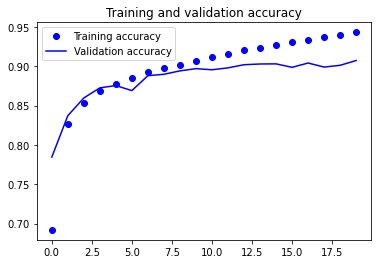

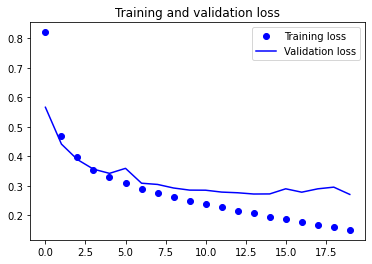

In [44]:
# plot the accuracy and loss plots between training and validation data

accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')  #bo?
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show() #show?figure?

In [18]:
# Adding Dropout into te Network

batch_size = 64
epochs = 20
num_classes = 10

In [19]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [20]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)         

In [21]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [22]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 53s 1ms/step - loss: 0.5894 - accuracy: 0.7822 - val_loss: 0.3726 - val_accuracy: 0.8658
Epoch 2/20
48000/48000 [==============================] - 53s 1ms/step - loss: 0.3718 - accuracy: 0.8646 - val_loss: 0.3099 - val_accuracy: 0.8844
Epoch 3/20
48000/48000 [==============================] - 52s 1ms/step - loss: 0.3222 - accuracy: 0.8795 - val_loss: 0.2888 - val_accuracy: 0.8942
Epoch 4/20
48000/48000 [==============================] - 52s 1ms/step - loss: 0.2991 - accuracy: 0.8892 - val_loss: 0.2690 - val_accuracy: 0.9014
Epoch 5/20
48000/48000 [==============================] - 53s 1ms/step - loss: 0.2797 - accuracy: 0.8957 - val_loss: 0.2595 - val_accuracy: 0.9035
Epoch 6/20
48000/48000 [==============================] - 53s 1ms/step - loss: 0.2662 - accuracy: 0.9019 - val_loss: 0.2391 - val_accuracy: 0.9116
Epoch 7/20
48000/48000 [==============================] - 53s 1ms/st

In [23]:
# save the model so that you can directly load it and not have to train it again for 20 epochs. This way, you can load the model later on if you need it and modify the architecture; Alternatively, you can start the training process on this saved model. It is always a good idea to save the model -and even the model's weights!- because it saves you time. Note that you can also save the model after every epoch so that, if some issue occurs that stops the training at an epoch, you will not have to start the training from the beginning.

fashion_model.save("fashion_model_dropout.h5py") 

In [24]:
# Model Evaluation on the Test Set
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

10000/10000 [==============================] - 3s 338us/step


In [25]:
print('Test loss:', test_eval[0])
# plot the accuracy and loss plots between training and validation dataprint('Test accuracy:', test_eval[1])

Test loss: 0.22584365205168724
Test accuracy: 0.9133999943733215


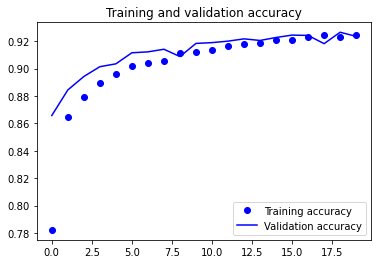

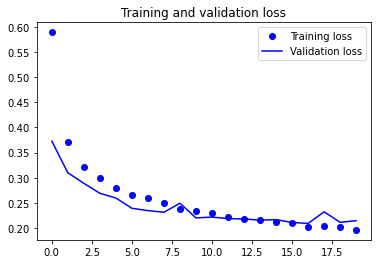

In [27]:
# plot the accuracy and loss plots between training and validation data

accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [28]:
# Predict Labels

predicted_classes = fashion_model.predict(test_X)

In [29]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [30]:
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

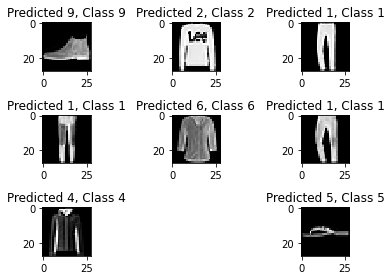

In [35]:
# correct label

correct = np.where(predicted_classes==test_Y)[0]

for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

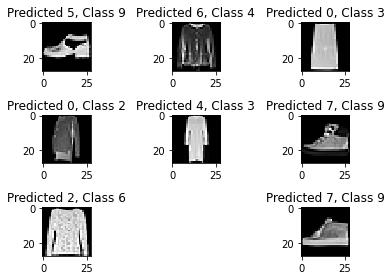

In [36]:
# incorrect label

incorrect = np.where(predicted_classes!=test_Y)[0]

for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [37]:
# classification report 

from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.79      0.85      0.82      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.86      0.88      0.87      1000
     Class 3       0.92      0.93      0.92      1000
     Class 4       0.88      0.83      0.85      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.77      0.76      0.76      1000
     Class 7       0.94      0.99      0.96      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
# You can see that the classifier is underperforming for class 6 regarding both precision and recall. For class 0 and class 2, the classifier is lacking precision. Also, for class 4, the classifier is slightly lacking both precision and recall.